# Environment Setup

## Import Libraries

In [366]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

## Import Data

In [367]:
generated_data_filepath = '../../data/generated/demand-forecast/'

vendor_data = pd.read_pickle(f'{generated_data_filepath}vendors.pkl')
purchase_history_data = pd.read_pickle(f'{generated_data_filepath}purchase_history.pkl')
product_demand_data = pd.read_pickle(f'{generated_data_filepath}product_demand.pkl')

In [368]:
demand_forecast_data_plots_file_path = '../../reports/demand-forecast/'

# Exploratory Data Analysis

## Data Shape Details

In [369]:
vendor_data.shape, purchase_history_data.shape, product_demand_data.shape

((100, 4), (50100, 5), (730, 9))

## Data Information Details

In [370]:
import io
import matplotlib.pyplot as plt

def save_dataframe_info_as_image(df, filename):
    # Create a buffer to store the info output
    buffer = io.StringIO()
    df.info(buf=buffer)
    info_str = buffer.getvalue()
    
    # Define figure and axis with adjusted size
    fig, ax = plt.subplots(figsize=(5, 3))  # Increase figsize for more space
    
    # Remove default axis
    ax.axis('off')
    
    # Plotting the DataFrame info as text
    ax.text(0, 1, info_str, va='top', fontsize=12, family='monospace')  # Adjusted position and va
    
    # Adjust layout with reduced padding
    fig.tight_layout(pad=0.5)  # Adjusted padding
    
    # Save the plot as an image with specified filename and path
    # save_path = '../../reports/demand-forecast/' + filename + '.png'
    plt.savefig(f'{demand_forecast_data_plots_file_path}{filename}.png', bbox_inches='tight')
    plt.close()


In [371]:
vendor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   vendor_name          100 non-null    object
 1   location             100 non-null    object
 2   ingredient_supplied  100 non-null    object
 3   category             100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [372]:
save_dataframe_info_as_image(vendor_data,'vendor_info')

In [373]:
purchase_history_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50100 entries, 0 to 50099
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   vendor_name    50100 non-null  object        
 1   ingredient     50100 non-null  object        
 2   category       50100 non-null  object        
 3   quantity       50000 non-null  float64       
 4   purchase_date  50100 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.9+ MB


In [374]:
save_dataframe_info_as_image(purchase_history_data,'purchase_history_data_info')

In [375]:
product_demand_data.info

<bound method DataFrame.info of      timestamp    product_id  demand      price  promotion  temperature  \
0   2023-01-01  Bell Peppers      94  60.891186          0    38.630601   
1   2023-01-01        Cheese      98  22.108710          0    23.877024   
2   2023-01-02          Salt      33   2.609250          0    -4.800778   
3   2023-01-02         Basil      78  30.681360          1   -13.291511   
4   2023-01-03  Bell Peppers      32  26.702867          0   -15.476022   
..         ...           ...     ...        ...        ...          ...   
725 2023-12-29       Bananas      40  89.506523          1    28.418152   
726 2023-12-30          Eggs      53  66.679415          0     5.905626   
727 2023-12-30          Corn      33  16.313606          1    10.740881   
728 2023-12-31      Cucumber      90  99.707883          1   -17.334264   
729 2023-12-31        Grapes      99  65.966765          1     3.324982   

     economic_indicator  social_media_sentiment  previous_demand  


In [376]:
save_dataframe_info_as_image(product_demand_data,'product_demand_data_info')

## Missing Values Identification

In [377]:
vendor_data.isnull().sum()

vendor_name            0
location               0
ingredient_supplied    0
category               0
dtype: int64

In [378]:
purchase_history_data.isnull().sum()

vendor_name        0
ingredient         0
category           0
quantity         100
purchase_date      0
dtype: int64

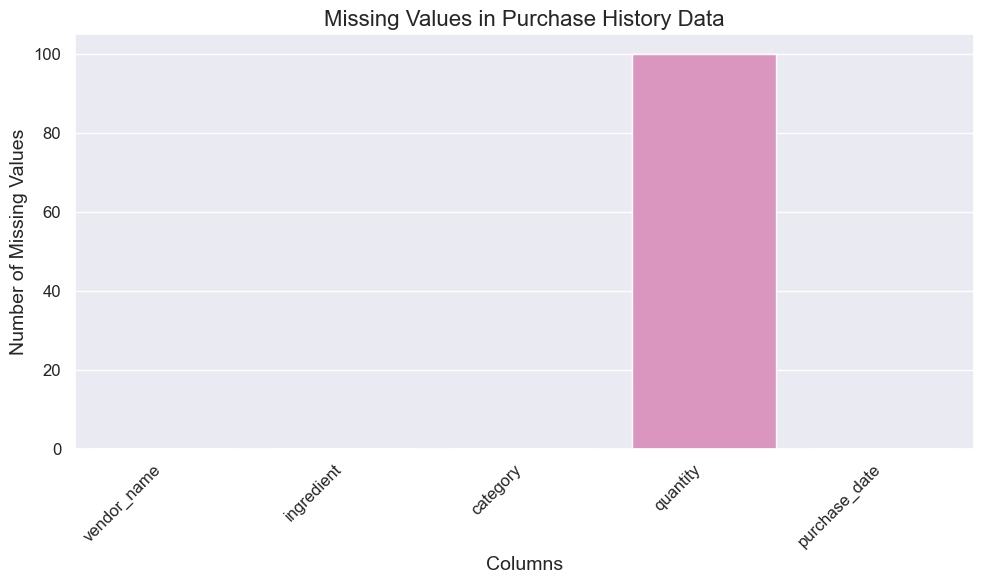

In [379]:
# Calculate missing values
missing_values = purchase_history_data.isnull().sum()

# Plotting using Seaborn with a pleasing color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='Set2')
plt.title('Missing Values in Purchase History Data', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f'{demand_forecast_data_plots_file_path}purchase_history_missing_values.png', bbox_inches='tight')
plt.show()

In [380]:
# Handle missing value by imputation with median

median_quantity = purchase_history_data['quantity'].median()
purchase_history_data['quantity'].fillna(median_quantity, inplace=True)

In [381]:
product_demand_data.isnull().sum()

timestamp                 0
product_id                0
demand                    0
price                     0
promotion                 0
temperature               0
economic_indicator        0
social_media_sentiment    0
previous_demand           0
dtype: int64

# Data Visualization


## Vendor Data

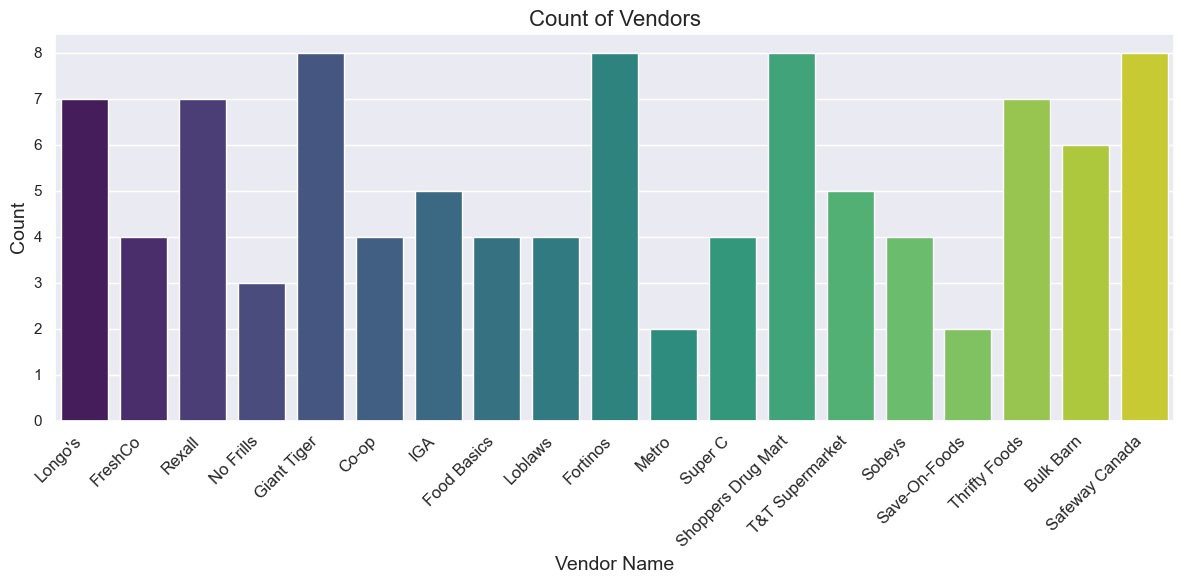

In [382]:
# Countplot of vendor names
plt.figure(figsize=(12, 6))
sns.countplot(x='vendor_name', data=vendor_data, palette='viridis')
plt.title('Count of Vendors', fontsize=16)
plt.xlabel('Vendor Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.savefig(f'{demand_forecast_data_plots_file_path}vendor_data_count_plot_vendor_names.png', bbox_inches='tight')
plt.show()


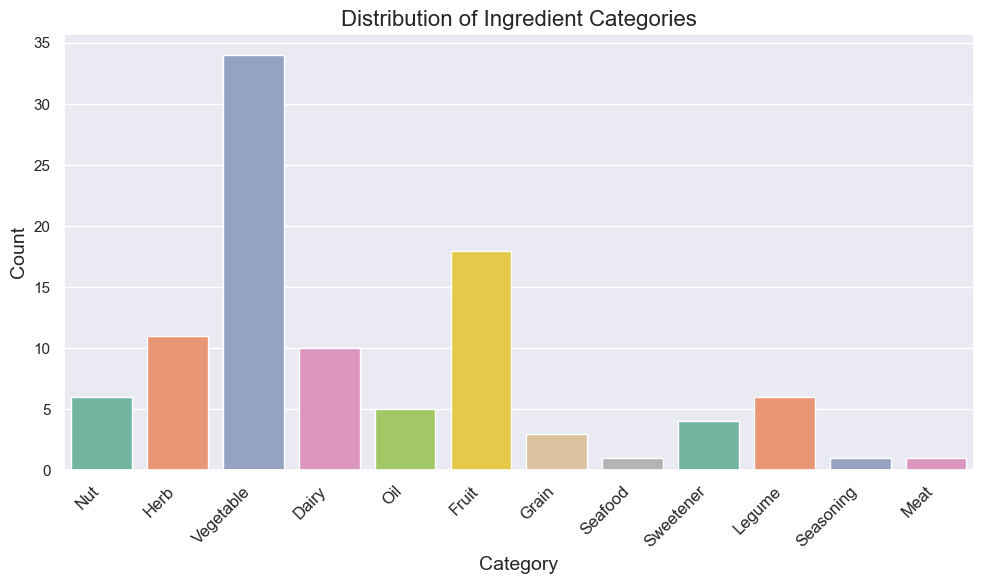

In [383]:
# Countplot of ingredient categories
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=vendor_data, palette='Set2')
plt.title('Distribution of Ingredient Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.savefig(f'{demand_forecast_data_plots_file_path}vendor_data_countplot_ingrediant_categories.png', bbox_inches='tight')
plt.show()


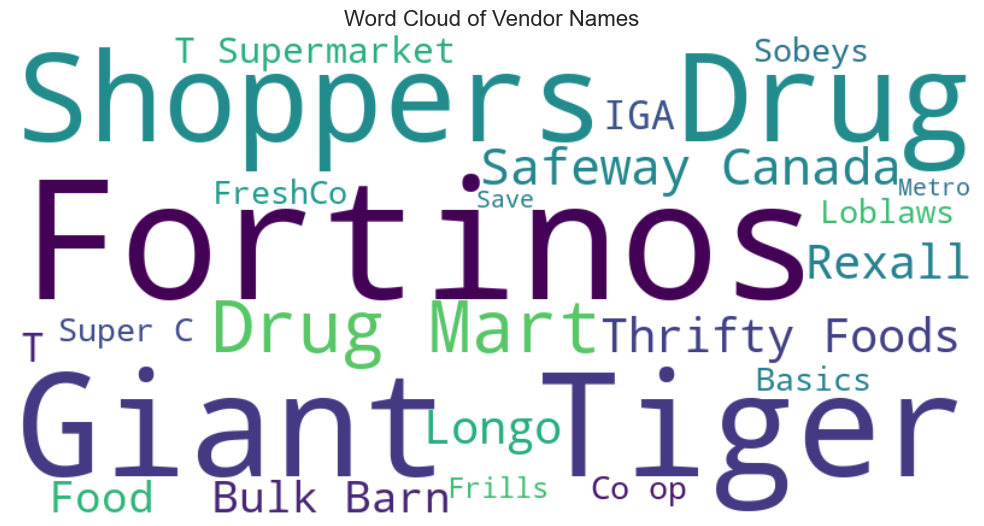

In [384]:
# Concatenate all vendor names into a single string
vendor_names_text = ' '.join(vendor_data['vendor_name'])

# Generate word cloud
wordcloud_vendors = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(vendor_names_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_vendors, interpolation='bilinear')
plt.title('Word Cloud of Vendor Names', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.savefig(f'{demand_forecast_data_plots_file_path}vendor_data_wordcloud_vendor_names.png', bbox_inches='tight')
plt.show()


In [385]:
# Correlation matrix for vendors_data
# plt.figure(figsize=(10, 8))
# corr_matrix_vendors = vendor_data.corr()
# sns.heatmap(corr_matrix_vendors, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix - Vendors Data')
# plt.tight_layout()
# plt.show()

## Purchase History Data

In [386]:
purchase_history_data.shape

(50100, 5)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


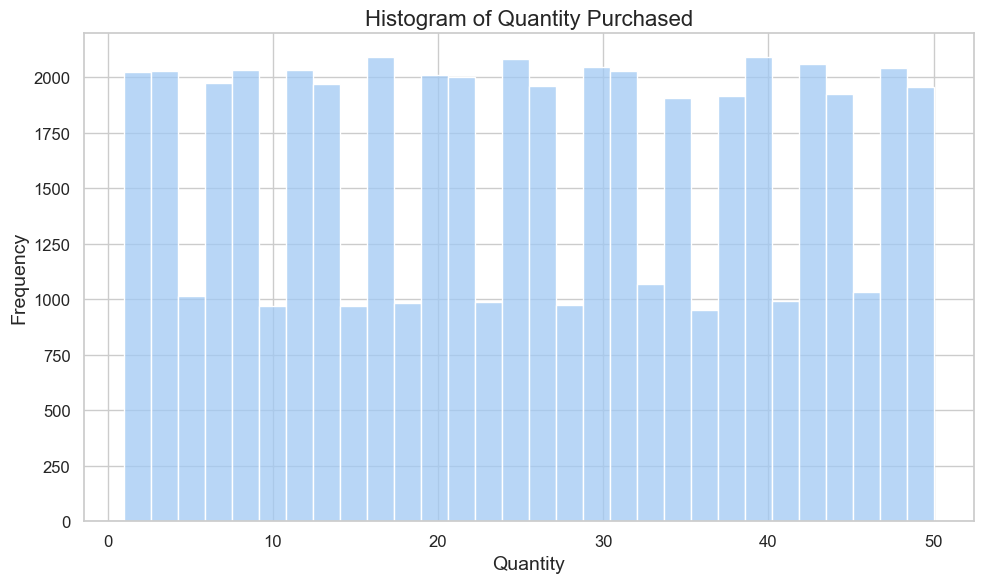

In [387]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme and color palette
sns.set_theme(style="whitegrid", palette="pastel")

# Plot histogram of quantity purchased
plt.figure(figsize=(10, 6))
sns.histplot(purchase_history_data['quantity'], bins=30, kde=False)
plt.title('Histogram of Quantity Purchased', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f'{demand_forecast_data_plots_file_path}purchase_history_histogram_quantity_purchased.png', bbox_inches='tight')
plt.show()


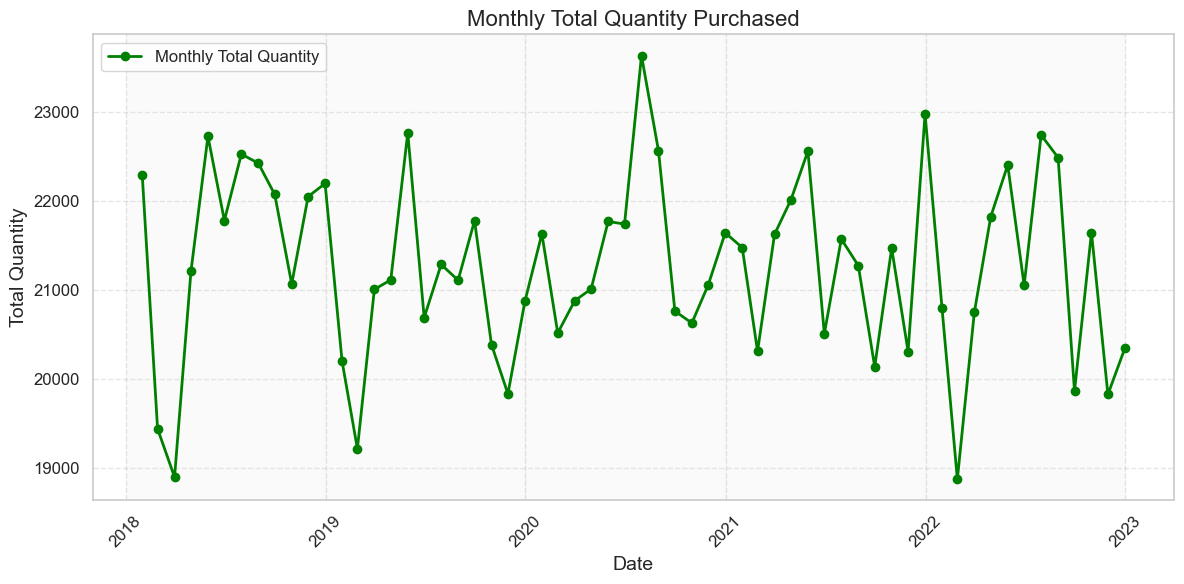

In [388]:
# Convert purchase_date to datetime
purchase_history_data['purchase_date'] = pd.to_datetime(purchase_history_data['purchase_date'])

# Aggregate data to monthly totals
monthly_purchase_data = purchase_history_data.resample('M', on='purchase_date')['quantity'].sum().reset_index()

# Plotting the downsampled line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_purchase_data['purchase_date'], monthly_purchase_data['quantity'], marker='o', color='green', linewidth=2, label='Monthly Total Quantity')

# Adding titles and labels
plt.title('Monthly Total Quantity Purchased', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Quantity', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Adding grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)

# Adding shaded regions for years
for year in range(2018, 2023):
    plt.axvspan(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'), color='lightgray', alpha=0.1)

plt.tight_layout()
plt.savefig(f'{demand_forecast_data_plots_file_path}purchase_history_monthly_quantity_purchased.png', bbox_inches='tight')
plt.show()


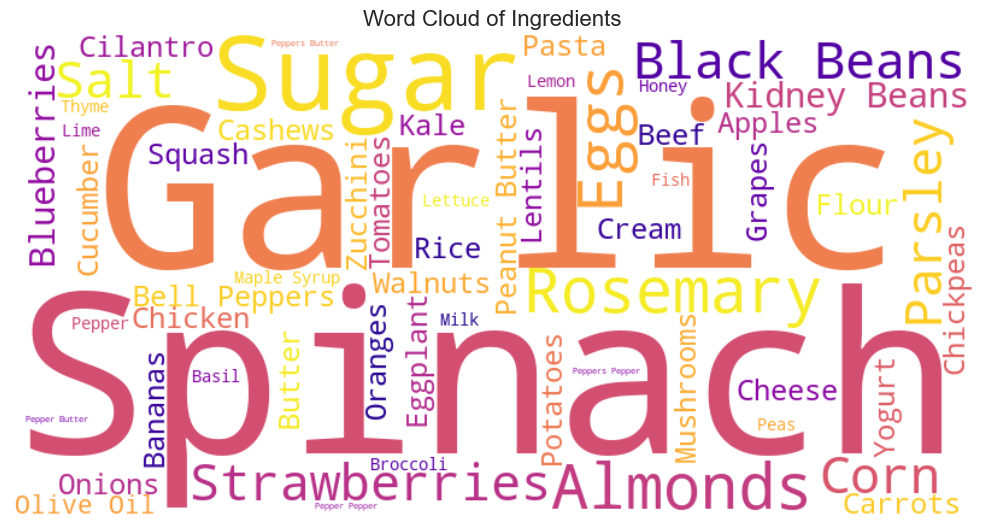

In [389]:
# Concatenate all ingredients into a single string
ingredients_text = ' '.join(purchase_history_data['ingredient'])

# Generate word cloud
wordcloud_ingredients = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(ingredients_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_ingredients, interpolation='bilinear')
plt.title('Word Cloud of Ingredients', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.savefig(f'{demand_forecast_data_plots_file_path}purchase_history_wordcloud_ingrediants.png', bbox_inches='tight')
plt.show()


In [390]:
# # Correlation matrix for purchase_history_data
# plt.figure(figsize=(10, 8))
# corr_matrix_purchase = purchase_history_data.corr()
# sns.heatmap(corr_matrix_purchase, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix - Purchase History Data')
# plt.tight_layout()
# plt.show()


## Demand Forecast Data

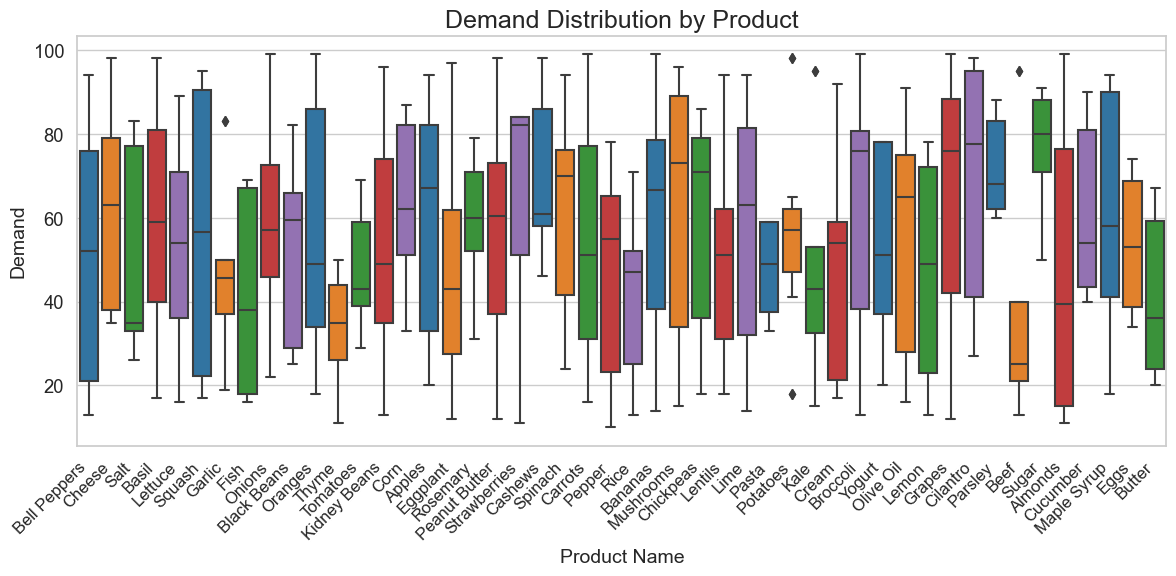

In [391]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'product_demand_data' is your DataFrame with product demand data

# Set the seaborn style
sns.set(style='whitegrid', font_scale=1.2)

# Choose a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plotting the boxplot with custom palette
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_id', y='demand', data=product_demand_data, palette=custom_palette)

# Adding titles and labels
plt.title('Demand Distribution by Product', fontsize=18)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.savefig(f'{demand_forecast_data_plots_file_path}product_demand_data_boxplot_demand_distribution_by_product.png', bbox_inches='tight')
plt.show()


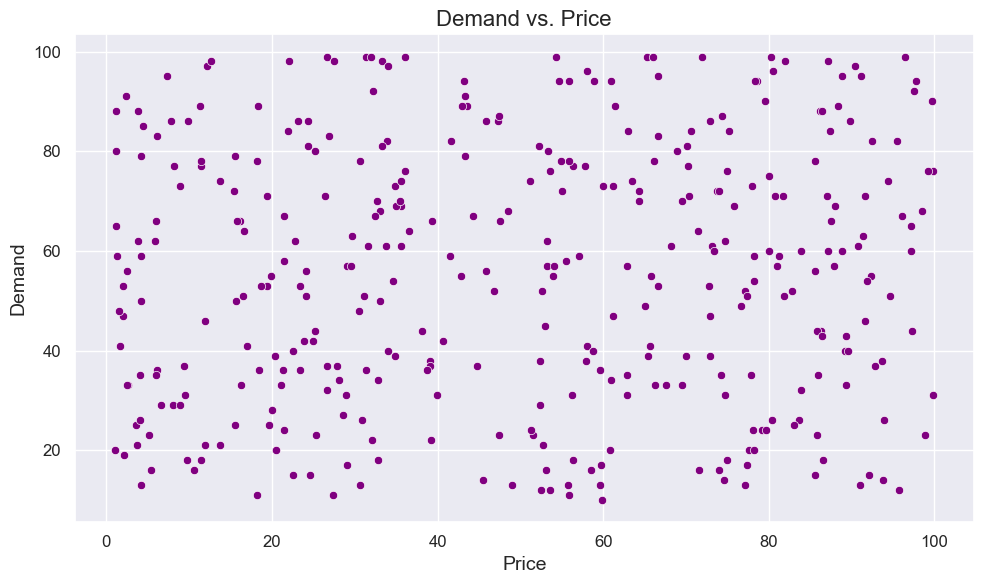

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'product_demand_data' is your DataFrame with product demand data

# Set the seaborn theme and style
sns.set_theme()

plt.figure(figsize=(10, 6))

# Plotting the scatter plot with original aesthetics
sns.scatterplot(x='price', y='demand', data=product_demand_data, color='purple')
plt.title('Demand vs. Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f'{demand_forecast_data_plots_file_path}product_demand_data_scatter_plot_demand_vs_price.png', bbox_inches='tight')
plt.show()


In [393]:
# Correlation matrix for demand_forecast_data
# plt.figure(figsize=(10, 8))
# corr_matrix_demand = product_demand_data.corr()
# sns.heatmap(corr_matrix_demand, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix - Demand Forecast Data')
# plt.tight_layout()
# plt.show()


## Dataset Relations

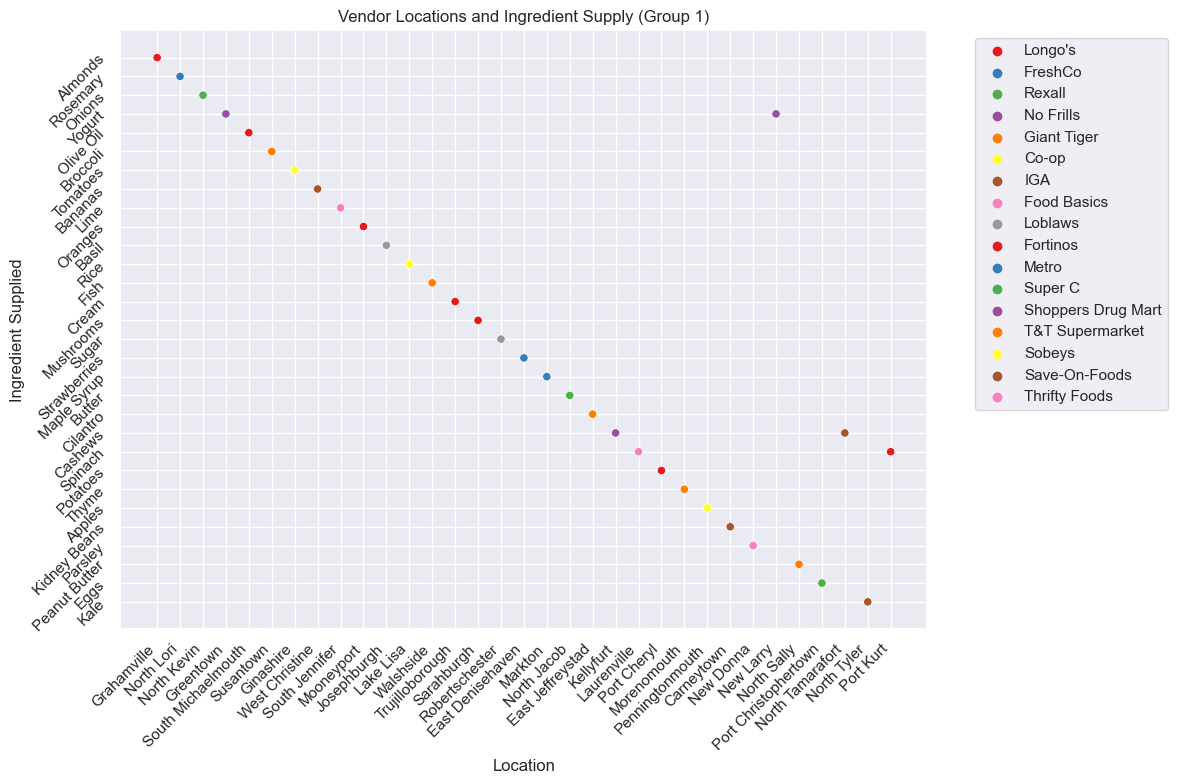

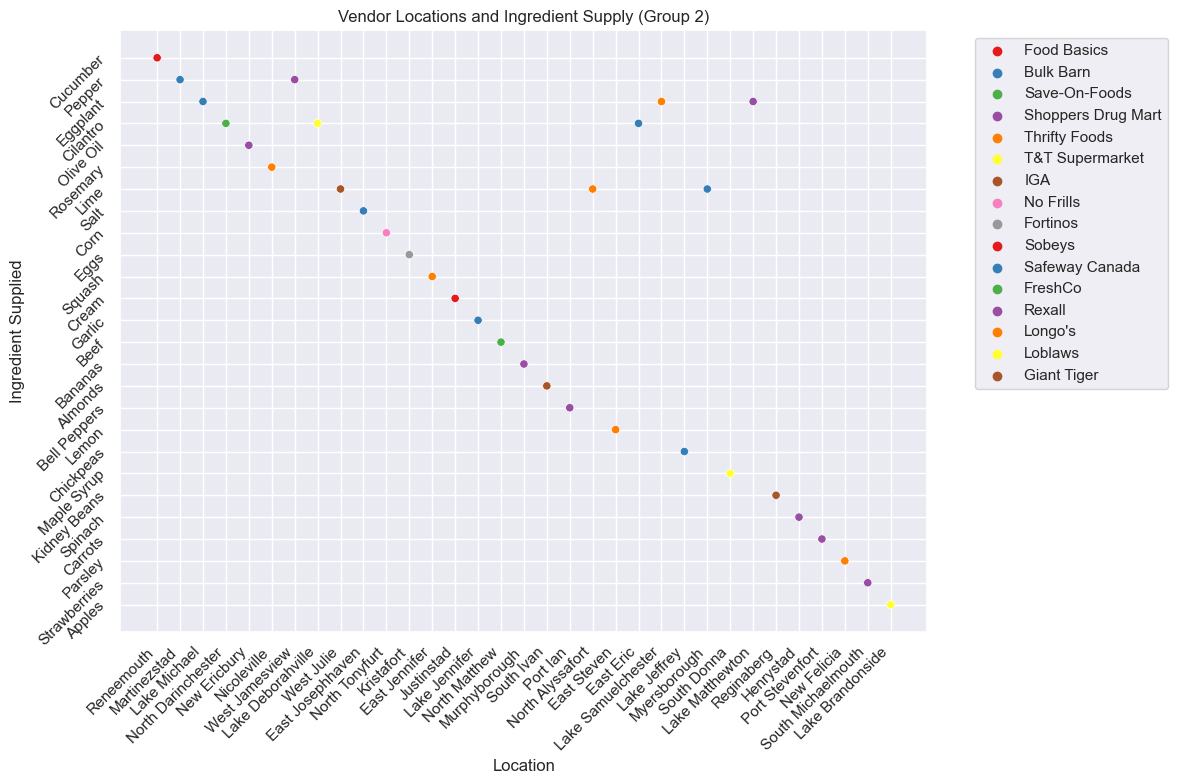

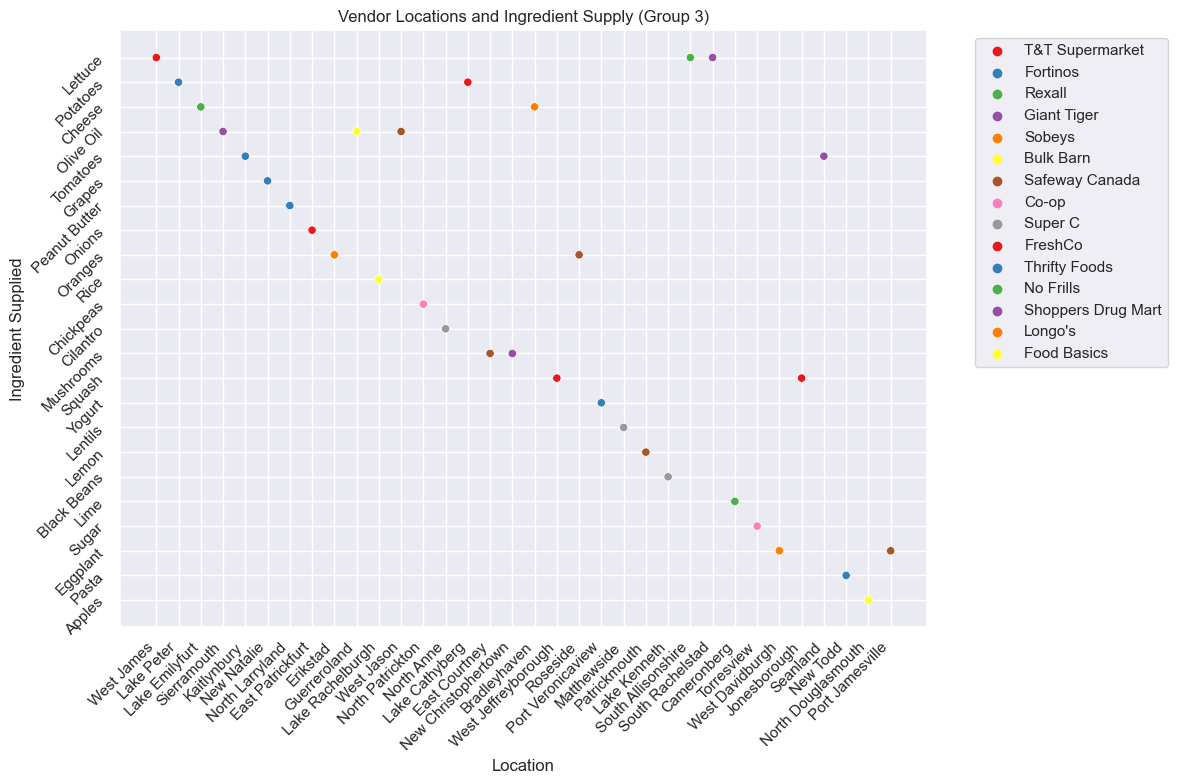

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming vendors_data is your DataFrame with vendor locations and ingredient supply

# Splitting the data into three groups (for demonstration purposes)
group_size = len(vendor_data) // 3
vendors_data_group1 = vendor_data.iloc[:group_size]
vendors_data_group2 = vendor_data.iloc[group_size:2*group_size]
vendors_data_group3 = vendor_data.iloc[2*group_size:]

# Plot for Group 1
plt.figure(figsize=(12, 8))
sns.scatterplot(x='location', y='ingredient_supplied', hue='vendor_name', data=vendors_data_group1, palette='Set1')
plt.title('Vendor Locations and Ingredient Supply (Group 1)')
plt.xlabel('Location')
plt.ylabel('Ingredient Supplied')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'{demand_forecast_data_plots_file_path}vendor_scatterplot_vendor_location_to_ingrediant_group_1.png', bbox_inches='tight')
plt.show()

# Plot for Group 2
plt.figure(figsize=(12, 8))
sns.scatterplot(x='location', y='ingredient_supplied', hue='vendor_name', data=vendors_data_group2, palette='Set1')
plt.title('Vendor Locations and Ingredient Supply (Group 2)')
plt.xlabel('Location')
plt.ylabel('Ingredient Supplied')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'{demand_forecast_data_plots_file_path}vendor_scatterplot_vendor_location_to_ingrediant_group_2.png', bbox_inches='tight')
plt.show()

# Plot for Group 3
plt.figure(figsize=(12, 8))
sns.scatterplot(x='location', y='ingredient_supplied', hue='vendor_name', data=vendors_data_group3, palette='Set1')
plt.title('Vendor Locations and Ingredient Supply (Group 3)')
plt.xlabel('Location')
plt.ylabel('Ingredient Supplied')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'{demand_forecast_data_plots_file_path}vendor_scatterplot_vendor_location_to_ingrediant_group_3.png', bbox_inches='tight')
plt.show()


In [395]:
# Purchase History and Vendor Relationships - Stacked Bar Plot

# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming purchase_history_data is your DataFrame with purchase history data

# # Aggregate purchase history by vendor and date
# purchase_history_agg = purchase_history_data.groupby(['purchase_date', 'vendor_name'])['quantity'].sum().reset_index()

# # Pivot table to prepare for stacked bar plot
# purchase_history_pivot = purchase_history_agg.pivot(index='purchase_date', columns='vendor_name', values='quantity').fillna(0)

# # Plot stacked bar chart
# plt.figure(figsize=(14, 8))
# purchase_history_pivot.plot(kind='bar', stacked=True, cmap='tab20')
# plt.title('Total Quantity Purchased by Vendor Over Time')
# plt.xlabel('Date')
# plt.ylabel('Total Quantity Purchased')
# plt.xticks(fontsize=10, rotation=45, ha='right')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()



In [396]:
# # Demand Forecast and Purchase History Comparison - Line Plot

# # Aggregate demand forecast data by date
# demand_forecast_agg = product_demand_data.groupby('timestamp')['demand'].sum().reset_index()

# # Aggregate purchase history data by date
# purchase_history_agg = purchase_history_data.groupby('purchase_date')['quantity'].sum().reset_index()

# # Plot demand vs. purchase history
# plt.figure(figsize=(12, 6))
# sns.lineplot(x='timestamp', y='demand', data=demand_forecast_agg, label='Demand Forecast')
# sns.lineplot(x='purchase_date', y='quantity', data=purchase_history_agg, label='Purchase History')
# plt.title('Demand Forecast vs. Purchase History')
# plt.xlabel('Date')
# plt.ylabel('Quantity')
# plt.xticks(rotation=45, ha='right')
# plt.legend()
# plt.tight_layout()
# plt.show()


In [397]:
# # Correlation Between Variables Across Datasets - Pairplot

# # Combine datasets for joint analysis
# combined_data = pd.merge(vendor_data, purchase_history_data, on='vendor_name')
# combined_data = pd.merge(combined_data, product_demand_data, left_on='ingredient_supplied', right_on='product_id')

# # Select numeric columns for pairplot
# numeric_cols = ['quantity', 'demand', 'price', 'promotion', 'temperature', 'economic_indicator', 'social_media_sentiment', 'previous_demand']

# # Plot pairplot
# sns.pairplot(combined_data[numeric_cols])
# plt.suptitle('Pairplot of Numeric Variables Across Datasets', fontsize=16)
# plt.tight_layout()
# plt.show()


# Export Data to Pickle

In [398]:
# Save datasets to Pickle

generated_data_filepath = '../../data/generated/demand-forecast/'

vendor_data.to_pickle(f'{generated_data_filepath}vendors.pkl')
purchase_history_data.to_pickle(f'{generated_data_filepath}purchase_history.pkl')
product_demand_data.to_pickle(f'{generated_data_filepath}product_demand.pkl')